# Resolução Exercício

![alt text](Enunciado1.1.png)

![alt text](Enunciado1.2.png)

![alt text](Enunciado1.3.png)

![alt text](Enunciado1.4.png)


Calculando N = 100...
  Fração 0.0%: 0.01 segundos
  Fração 1.0%: 0.00 segundos
  Fração 2.0%: 0.00 segundos
  Fração 3.0%: 0.00 segundos
  Fração 4.0%: 0.00 segundos
  Fração 5.0%: 0.00 segundos


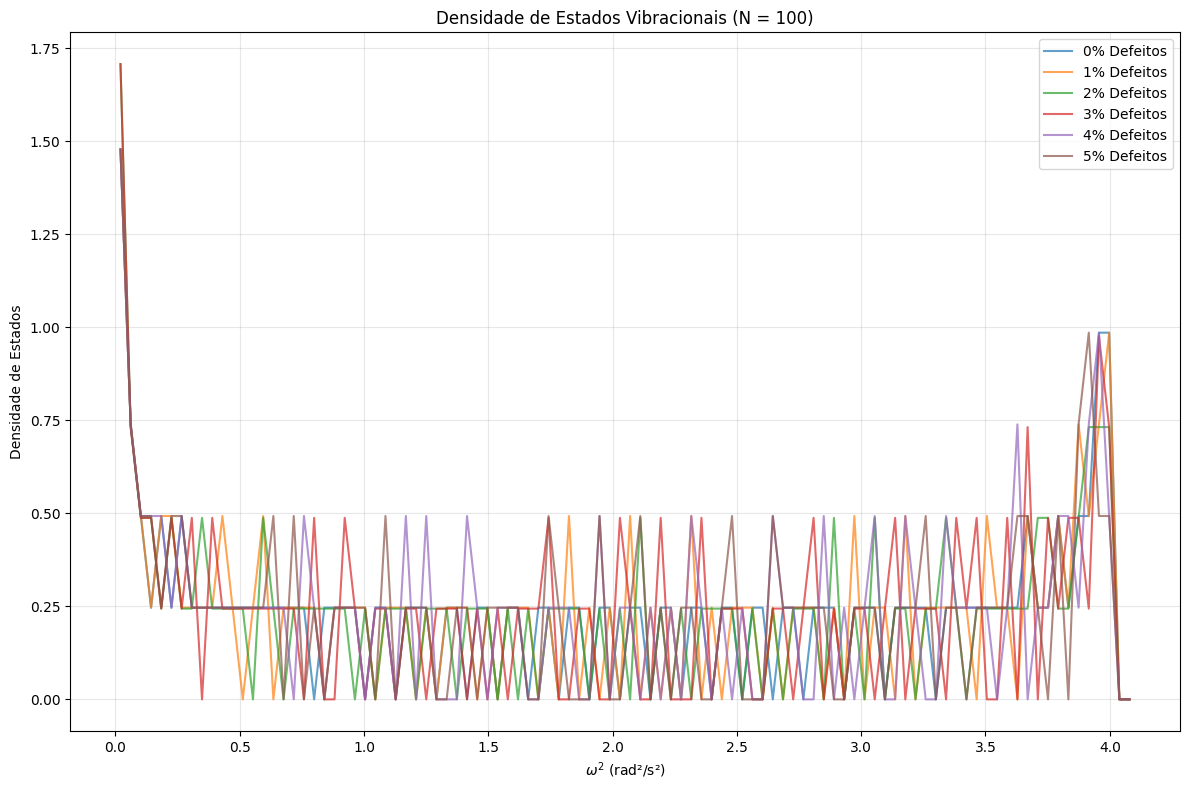


Calculando N = 1000...
  Fração 0.0%: 0.02 segundos
  Fração 1.0%: 0.02 segundos
  Fração 2.0%: 0.02 segundos
  Fração 3.0%: 0.02 segundos
  Fração 4.0%: 0.01 segundos
  Fração 5.0%: 0.01 segundos


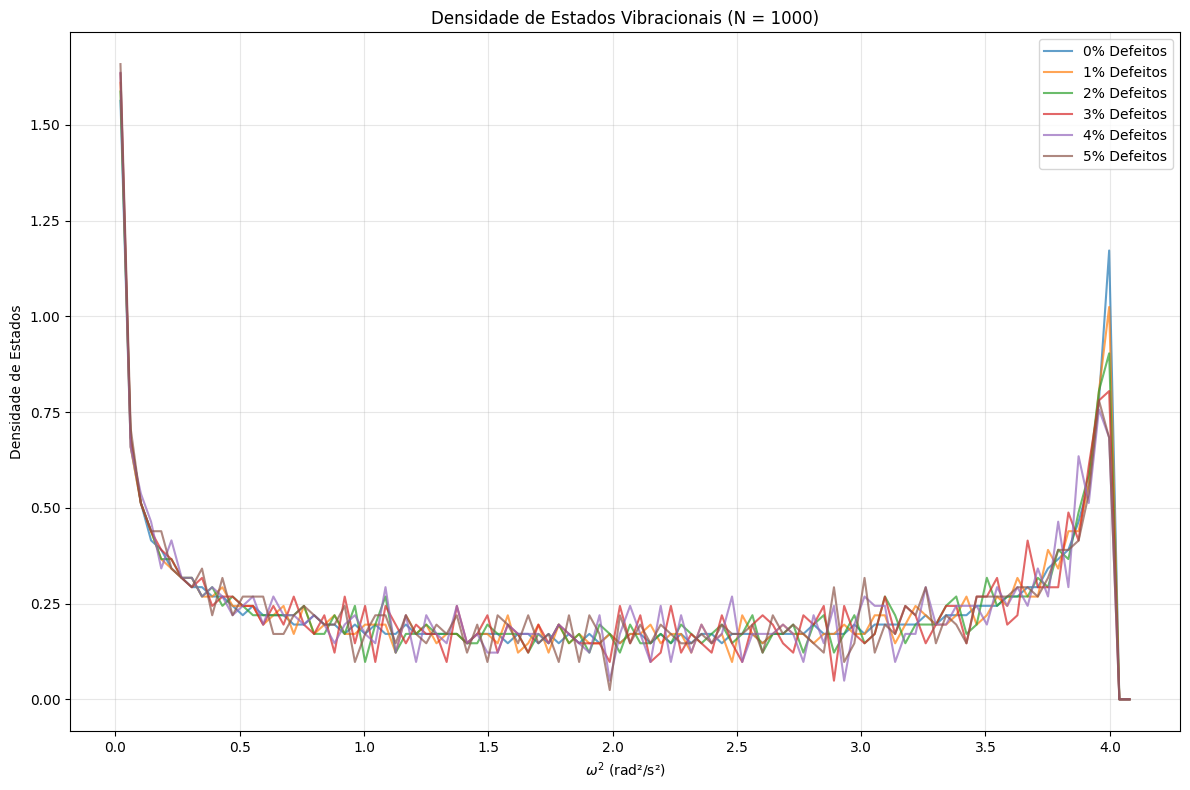


Calculando N = 10000...
  Fração 0.0%: 1.16 segundos
  Fração 1.0%: 1.14 segundos
  Fração 2.0%: 1.16 segundos
  Fração 3.0%: 1.19 segundos
  Fração 4.0%: 1.18 segundos
  Fração 5.0%: 1.21 segundos


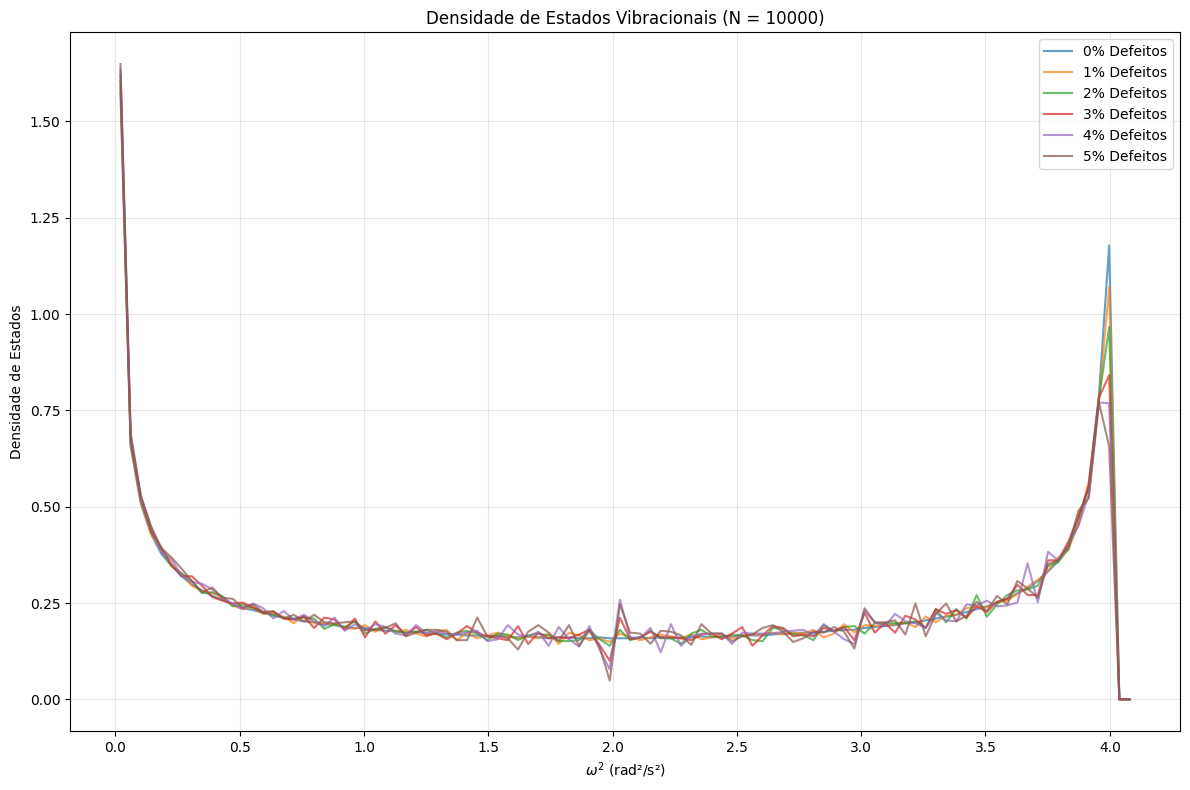

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

# Parâmetros físicos
m = 1.0          # Massa base (kg)
k = 1.0           # Constante elástica (kg/s²)
N_values = [100, 1000, 10000]  # Tamanhos das cadeias
defect_fractions = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]  # Frações de defeitos
num_bins = 100    # Número de bins para histogramas
omega2_max = 4.1  # Valor máximo de ω² para histogramas (k/m = 1)
np.random.seed(00) # Semente para reprodutibilidade

# Função para gerar vetor de massas com defeitos
def generate_masses(N, defect_fraction):
    masses = np.full(N, m)  # Todos átomos com massa m
    if defect_fraction > 0:
        num_defects = int(N * defect_fraction)
        defect_indices = np.random.choice(N, num_defects, replace=False)
        masses[defect_indices] = 3 * m  # Defeitos com massa 3m
    return masses

# Função para calcular as frequências ao quadrado (autovalores)
def compute_frequencies(masses, k):
    N = len(masses)
    # Diagonal principal
    main_diag = np.zeros(N)
    main_diag[0] = k / masses[0]        # Primeiro átomo
    main_diag[-1] = k / masses[-1]       # Último átomo
    if N > 2:
        main_diag[1:-1] = 2 * k / masses[1:-1]  # Átomos internos
    
    # Diagonal secundária
    off_diag = np.zeros(N-1)
    for i in range(N-1):
        off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])
    
    # Calcular autovalores (ω²)
    eigenvalues = eigh_tridiagonal(main_diag, off_diag, eigvals_only=True)
    return eigenvalues

# Simulação para cada tamanho de cadeia
for N in N_values:
    plt.figure(figsize=(12, 8))
    print(f"\nCalculando N = {N}...")
    
    for frac in defect_fractions:
        start_time = time.time()
        # Gerar massas e calcular frequências
        masses = generate_masses(N, frac)
        eigenvalues = compute_frequencies(masses, k)
        
        # Calcular histograma (Densidade de Estados)
        hist, bin_edges = np.histogram(eigenvalues, bins=num_bins, range=(0, omega2_max), density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Plotar DOS
        plt.plot(bin_centers, hist, alpha=0.7, label=f'{frac*100:.0f}% Defeitos')
        print(f"  Fração {frac*100}%: {time.time()-start_time:.2f} segundos")
    
    plt.title(f'Densidade de Estados Vibracionais (N = {N})')
    plt.xlabel('$\omega^2$ (rad²/s²)')
    plt.ylabel('Densidade de Estados')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'dos_N{N}.png', dpi=300)
    plt.show()